<a href="https://colab.research.google.com/github/LucasTWJT/EngajamentoInstagram_CriacaoDeInsight/blob/main/An%C3%A1lise_do_engajamento_de_Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando o engajamento do Instagram

### Perguntas?
- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?
<br><br>
- Temos a base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Ele também dá alguns direcionamentos:
    - Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)

### Vamos importar e visualizar a nossa base

In [ ]:
# Importando o pandas
import pandas as pd

In [ ]:
# Importar a base em excel
df = pd.read_excel(r'/content/sample_data/Engajamento no Instagram.xlsx')
df.drop('Visualizações', axis=1, inplace=True)

In [ ]:
# Visualizando as 5 primeiras linhas
display(df.head(), df.shape)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


(52, 9)

### Como ele pediu para não considerar a coluna visualizações, vamos retirar essa coluna da base

In [ ]:
# Verificando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


Carrossel com muito valores nulos.

### Carrossel possui apenas 8 valores não nulos
- Vamos entender os valores de carrossel

In [ ]:
# Contando os valores que aparecem na coluna Carrossel
df.Carrossel.value_counts()

S    8
Name: Carrossel, dtype: int64

In [ ]:
df[['Tipo', 'Carrossel']].head(10)

,Tipo,Carrossel
0,Foto,NaN
1,Foto,NaN
2,Foto,NaN
3,Vídeo,NaN
4,Foto,NaN
5,Foto,S
6,Foto,NaN
7,Foto,NaN
8,Foto,S
9,Vídeo,NaN


A coluna carrossel pergunta para a linha se foi carrossel ou não, portanto, deveria ser uma coluna de "Sim" e "Não" e não uma de "Sim" e "NaN"

### Tratando os valores nulos

In [ ]:
df.loc[df.Carrossel.isnull() == True, 'Carrossel'] = 'N'

In [ ]:
df.Carrossel.head(10)

0    N
1    N
2    N
3    N
4    N
5    S
6    N
7    N
8    S
9    N
Name: Carrossel, dtype: object

### Mostrando as informações estatísticas

In [ ]:
# Descrição estatística da base
df.describe()

,Curtidas,Comentários,Interacoes
count,52.000000,52.000000,52.000000
mean,12262.730769,189.500000,12452.230769
std,8165.875326,170.687709,8299.390088
min,2807.000000,9.000000,2816.000000
25%,5492.000000,69.500000,5562.500000
50%,9603.000000,128.000000,9773.500000
75%,17621.750000,265.250000,17920.750000
max,37351.000000,852.000000,37853.000000


#### Observações:
 - Os máximos de inteções, comentários e curtidas são bem altos comparados a média e mediana;
 - Os mínimos também são extremos, tendo um desempenho bem pior do que os outros;
 - A média e mediana possuem uma significativa diferença, o que leva a crer que há alguns outliers nos dados.

#### Hipóteses/Insights:
 - Compreender as características das postagens que estão com os maiores engajamentos;
 - Compreender as características das postagens que estão com o engajamento na média e mediana;
 - Compreender as postagens que não engajaram.

### Visualizando essas informações de maneira gráfica

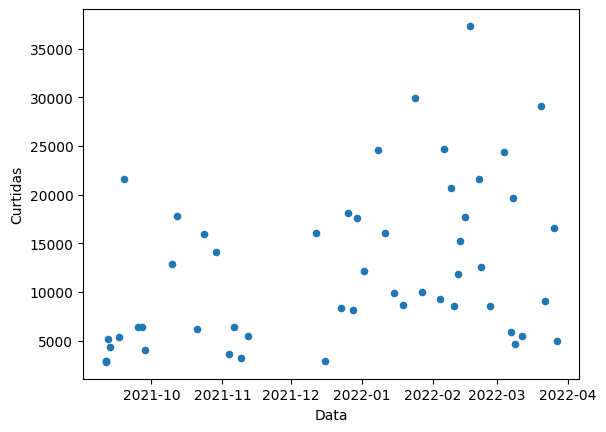

In [ ]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
df.plot(kind="scatter",x="Data",y="Curtidas");

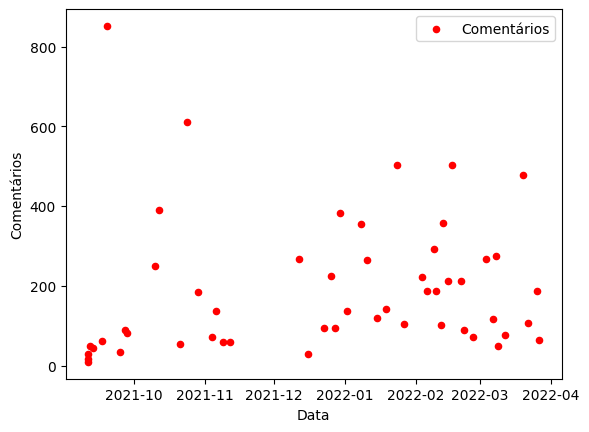

In [ ]:
# Podemos colocar curtidas e comentários no mesmo gráfico
df.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários");

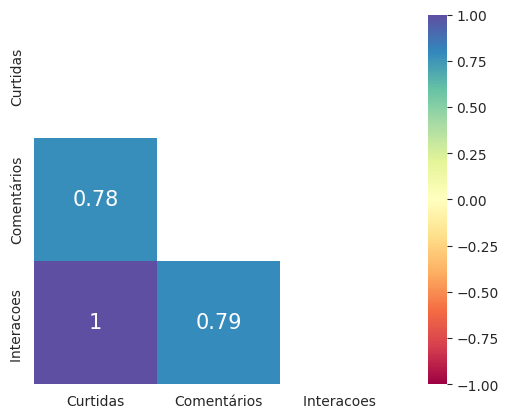

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=np.number).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots()
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, square=True, annot = True, cmap='Spectral', annot_kws={'size': 15})
plt.show()

- O gráfico e as informações estatítiscas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários
- Precisamos verificar se existe um padrão usando as outras colunas de informações
- Curtidas comentários e interações são altamente correlacionados, portanto quando avaliarmos um, consequentemente podemos considerar que os outros tiveram uma resposta similar.

### A primeira coisa que podemos fazer é pegar os 5 primeiros registros com mais e menos curtidas

In [ ]:
# Ordenando os valores
df.sort_values(by="Curtidas",ascending=False).head(10)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
40,Foto,2022-02-21,21621,213,Influenciadores,S,S,S,21834
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,N,22449
34,Foto,2022-02-09,20660,292,Influenciadores,S,S,N,20952
45,Reels,2022-03-08,19621,275,Trends,S,S,N,19896


In [ ]:
# Selecionando os 5 últimos valores
# Ordenando os valores
df.sort_values(by="Curtidas",ascending=True).head(10)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437
46,Foto,2022-03-09,4613,50,Influenciadores,S,N,N,4663
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,N,4999


- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**
- **Carrossel aparentemente não causa grandes impactos, mas talvez pode impactar nas medianas**

In [ ]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Agrupando as informações por tipo
df.groupby("Tipo")["Comentários"].count().sort_values(ascending=False)

Tipo
Foto     36
Vídeo     6
IGTV      5
Reels     5
Name: Comentários, dtype: int64

- Fotos foram as mais utilizadas como metodo de engajamento, enquantos os outros três métodos foram utilizados igualmente.

In [ ]:
df.groupby('Tipo')['Curtidas'].mean().sort_values(ascending=False)

Tipo
Reels   14,873.00
Foto    13,341.14
Vídeo    8,141.50
IGTV     6,833.40
Name: Curtidas, dtype: float64

- **Vídeo e IGTV aparentemente são estratégias que menos engajam o público**

In [ ]:
# Agrupando por Tipo e Pessoas
display(df.groupby(["Tipo","Pessoas"])["Curtidas"].mean(), df.groupby(["Tipo","Pessoas"])["Curtidas"].mean().sort_values(ascending=False))

Tipo   Pessoas
Foto   N          3,863.50
       S         15,236.67
IGTV   S          6,833.40
Reels  N          5,934.50
       S         20,832.00
Vídeo  N          4,007.50
       S         16,409.50
Name: Curtidas, dtype: float64

Tipo   Pessoas
Reels  S         20,832.00
Vídeo  S         16,409.50
Foto   S         15,236.67
IGTV   S          6,833.40
Reels  N          5,934.50
Vídeo  N          4,007.50
Foto   N          3,863.50
Name: Curtidas, dtype: float64

 - Aparentemente ter pessoas nas publicações é de extrema importância para o aumento do engajamento.
 - IGTV's aparentemente
 - Fotos e vídeos que não possuem pessoas não são uma boa ideia, visto que estão com um número de curtidas médio próximos ao do mínimo de curtidas total.

**E também aplicar a função de agregação em várias outras colunas:** <br>

In [ ]:
df.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

In [ ]:
# Incluindo a coluna de campanhas
df.groupby(["Tipo","Pessoas", "Campanhas"])["Curtidas"].mean().sort_values(ascending=False)

Tipo   Pessoas  Campanhas
Reels  S        S           24,801.00
Foto   S        S           19,105.38
Vídeo  S        S           16,409.50
Reels  S        N           12,894.00
Foto   S        N           10,815.29
IGTV   S        N            6,833.40
Reels  N        N            5,934.50
Foto   N        S            5,852.50
Vídeo  N        N            4,007.50
Foto   N        N            2,869.00
Name: Curtidas, dtype: float64

#### Positivo:
- Pessoas nas publicações são essenciais para o sucesso;
- A combinação de pessoas + campanhas funciona perfeitamente e são as que mais possuem engajamento.

#### Negativo:
- Campanhas sem alguém anunciando não parece ser uma boa ideia;
- Reels sem pessoas e que não são campanhas engajam metade do que engajariam com uma pessoa;
- Fotos e vídeos sem pessoas e campanhas não engajam bem

**Podemos então fazer os agrupamentos que acharmos melhor para entender os nossos dados**

In [ ]:
# Somente para pessoas
#df.groupby('Pessoas').mean()

  - Reafirmando a superioridade dem engajamento quando há pessoas do que quando não há.


- **Postagens com pessoas engajam muito mais para essa marca, sendo 3 vezes maior de quando não tem pessoas**

In [ ]:
# Somente para campanhas
df.groupby('Campanhas').mean()

<ipython-input-25-7a4f4533a4b1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Campanhas').mean()


,Curtidas,Comentários,Interacoes
Campanhas,,,
N,"7,928.33",123.17,"8,051.50"
S,"18,173.27",279.95,"18,453.23"


- **Quando é uma postagem de campanha, o engajamento também é melhor!**

In [ ]:
# Carrossel (sem filtrar a base)
df.groupby('Carrossel').mean()

<ipython-input-26-a2b548dc7d56>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Carrossel').mean()


,Curtidas,Comentários,Interacoes
Carrossel,,,
N,"12,343.61",198.43,"12,542.05"
S,"11,817.88",140.38,"11,958.25"


- Carrossel só acontecem em fotos, portanto há necessidade de filtrar esses dados

In [ ]:
# Podemos também filtrar a base
df[df.Tipo == 'Foto'].groupby('Carrossel').mean()

<ipython-input-27-3f0e1c12cce4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.Tipo == 'Foto'].groupby('Carrossel').mean()


,Curtidas,Comentários,Interacoes
Carrossel,,,
N,"13,776.36",208.57,"13,984.93"
S,"11,817.88",140.38,"11,958.25"


- Aparentemente carrosséis não possuem grande impacto no engajamento e dão mais trabalho para serem feitos

- **A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente**
    - Nesse caso devemos filtrar apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

**Colocando pessoas e campanhas juntos podemos ver como se dá essa diferença**

- **A média quando tem pessoas E é publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas**
<br><br>
- **Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**

- **Analisando novamente a questão do vídeo, ele não parece mais tão ruim assim. Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo a foto**
- O que poderia ter levado a média baixa é que só temos vídeo ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)
- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

#### Inclusive podemos entender o que havia gerado a média baixo no vídeo

In [ ]:
# Vamos filtrar a base apenas onde o tipo é Vídeo
df[df.Tipo == 'Vídeo']

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


- **Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo. Quando o vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!**

## Conclusões
- **Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém**
- **Postagens em épocas de campanha também possuem um melhor engajamento**
- **Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca**